## Simple Linear Regression

Estimated coefficients:
b_0 = 172295.88415409692            
b_1 = 1364.350502168852


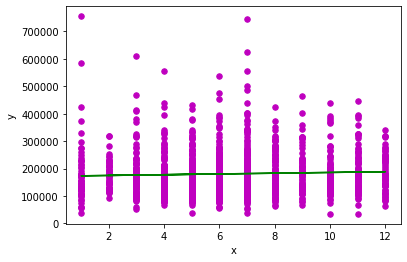

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
    
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
    
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
    
def main():
    # observations / data
    x = train.MoSold.values
    y = train.SalePrice.values

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()

In [57]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


## Multiple Linear Regression

In [45]:
train = pd.read_csv('train_House.csv')
test = pd.read_csv('test_House.csv')

In [56]:
train = train.drop(['Id','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','PoolQC','Fence','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','MiscFeature','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','PavedDrive','GarageCond','GarageQual','SaleCondition','SaleType','GarageFinish','Functional','FireplaceQu','GarageType'], axis = 1)
test = test.drop(['Id','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','PoolQC','Fence','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','MiscFeature','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','PavedDrive','GarageCond','GarageQual','SaleCondition','SaleType','GarageFinish','Functional','FireplaceQu','GarageType'], axis = 1)

In [4]:
train.fillna(train.mean(), inplace=True)

In [5]:
train_data = train.values
Y = train_data[:, -1].reshape(train_data.shape[0],1)
X = train_data[:,:-1]

In [6]:
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0],1)
X_test = test_data[:,:-1]

In [7]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
a = MinMaxScaler()

In [10]:
X = a.fit_transform(X)

In [11]:
# X.shape

In [12]:
a = MinMaxScaler()

In [13]:
Y = a.fit_transform(Y)

In [15]:
# Y

In [16]:
X.shape, Y.shape, X_test.shape, Y_test.shape

((1460, 37), (1460, 1), (1459, 36), (1459, 1))

In [27]:
def model(X, Y, learning_rate, iterations):
    m = Y.size
    cost = 100
    theta = np.zeros((X.shape[1], 1))
#     print(theta)
    cost_list = []
    for i in range(iterations):
        y_pred = np.dot(X, theta)
#         print(y_pred)
        cost = (1/(2*m))*np.sum(np.square(Y- y_pred))
        d_theta = (1/m)*np.dot(X.T, Y - y_pred)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        
        print(cost)
        
    return theta, cost_list

In [30]:
theta, cost_list = model(X, Y, learning_rate= 0.000000005, iterations=10000)

0.026640919287270397
0.026640920218614552
0.026640921149958734
0.026640922081302965
0.026640923012647227
0.026640923943991528
0.026640924875335856
0.026640925806680232
0.026640926738024644
0.02664092766936909
0.026640928600713574
0.0266409295320581
0.026640930463402657
0.02664093139474726
0.02664093232609189
0.026640933257436557
0.026640934188781266
0.026640935120126014
0.02664093605147079
0.026640936982815614
0.02664093791416047
0.026640938845505363
0.026640939776850295
0.026640940708195268
0.02664094163954027
0.026640942570885312
0.026640943502230396
0.02664094443357551
0.026640945364920662
0.026640946296265854
0.026640947227611084
0.026640948158956353
0.026640949090301656
0.026640950021646997
0.02664095095299237
0.02664095188433779
0.02664095281568324
0.02664095374702873
0.026640954678374257
0.026640955609719817
0.02664095654106542
0.026640957472411058
0.026640958403756736
0.02664095933510244
0.02664096026644819
0.02664096119779398
0.026640962129139804
0.026640963060485665
0.0266409

0.02664219619503431
0.02664219712642946
0.026642198057824647
0.02664219898921987
0.026642199920615135
0.02664220085201043
0.026642201783405765
0.02664220271480114
0.026642203646196547
0.02664220457759199
0.02664220550898748
0.026642206440382996
0.026642207371778557
0.026642208303174153
0.026642209234569787
0.026642210165965456
0.026642211097361167
0.02664221202875691
0.026642212960152692
0.026642213891548507
0.026642214822944363
0.02664221575434026
0.026642216685736186
0.026642217617132157
0.02664221854852816
0.026642219479924203
0.026642220411320285
0.026642221342716398
0.026642222274112552
0.026642223205508745
0.026642224136904976
0.026642225068301235
0.02664222599969754
0.026642226931093874
0.026642227862490257
0.02664222879388667
0.02664222972528312
0.026642230656679613
0.026642231588076132
0.0266422325194727
0.026642233450869298
0.026642234382265935
0.02664223531366261
0.026642236245059323
0.026642237176456075
0.026642238107852857
0.02664223903924968
0.026642239970646544
0.0266422

0.026643597055384757
0.026643597986835858
0.026643598918286993
0.026643599849738166
0.026643600781189374
0.02664360171264062
0.026643602644091907
0.026643603575543226
0.026643604506994586
0.02664360543844598
0.02664360636989742
0.02664360730134889
0.026643608232800396
0.026643609164251944
0.026643610095703527
0.026643611027155147
0.026643611958606803
0.026643612890058503
0.026643613821510228
0.026643614752961998
0.026643615684413802
0.026643616615865652
0.02664361754731753
0.02664361847876945
0.026643619410221406
0.026643620341673394
0.026643621273125424
0.026643622204577486
0.026643623136029592
0.026643624067481733
0.026643624998933912
0.02664362593038613
0.026643626861838382
0.02664362779329067
0.026643628724742997
0.02664362965619536
0.026643630587647755
0.026643631519100205
0.026643632450552672
0.026643633382005188
0.02664363431345774
0.026643635244910324
0.02664363617636295
0.026643637107815615
0.02664363803926831
0.026643638970721046
0.02664363990217382
0.026643640833626633
0.026

0.02664498402728498
0.026644984958791473
0.026644985890298005
0.026644986821804578
0.02664498775331118
0.026644988684817822
0.026644989616324506
0.02664499054783123
0.02664499147933798
0.026644992410844767
0.026644993342351597
0.026644994273858465
0.026644995205365368
0.02664499613687231
0.02664499706837929
0.026644997999886302
0.02664499893139335
0.02664499986290044
0.026645000794407573
0.026645001725914733
0.02664500265742193
0.026645003588929173
0.026645004520436447
0.026645005451943763
0.026645006383451117
0.026645007314958502
0.026645008246465925
0.026645009177973387
0.026645010109480886
0.026645011040988424
0.026645011972495993
0.026645012904003604
0.02664501383551125
0.026645014767018936
0.026645015698526658
0.02664501663003442
0.026645017561542216
0.026645018493050048
0.026645019424557916
0.026645020356065828
0.026645021287573775
0.026645022219081754
0.026645023150589774
0.026645024082097835
0.026645025013605928
0.026645025945114056
0.026645026876622225
0.026645027808130425
0.0

0.026646376671042967
0.026646377602605083
0.02664637853416723
0.026646379465729425
0.02664638039729165
0.026646381328853917
0.026646382260416216
0.026646383191978557
0.026646384123540933
0.026646385055103347
0.026646385986665803
0.026646386918228286
0.02664638784979081
0.026646388781353374
0.026646389712915976
0.026646390644478605
0.026646391576041286
0.026646392507603995
0.026646393439166742
0.02664639437072953
0.026646395302292354
0.026646396233855216
0.02664639716541811
0.026646398096981046
0.02664639902854402
0.02664639996010703
0.026646400891670072
0.026646401823233155
0.026646402754796274
0.02664640368635943
0.026646404617922625
0.02664640554948586
0.02664640648104913
0.026646407412612438
0.026646408344175778
0.026646409275739164
0.026646410207302577
0.026646411138866035
0.026646412070429528
0.02664641300199306
0.026646413933556625
0.026646414865120226
0.026646415796683875
0.026646416728247545
0.026646417659811267
0.026646418591375017
0.026646419522938808
0.026646420454502634
0.0

0.026647598912537693
0.02664759984414862
0.0266476007757596
0.0266476017073706
0.02664760263898164
0.026647603570592725
0.026647604502203843
0.026647605433815
0.02664760636542619
0.026647607297037423
0.026647608228648687
0.02664760916025999
0.026647610091871332
0.02664761102348271
0.026647611955094127
0.026647612886705578
0.026647613818317074
0.026647614749928595
0.026647615681540164
0.026647616613151768
0.026647617544763403
0.026647618476375076
0.02664761940798679
0.02664762033959854
0.026647621271210332
0.026647622202822158
0.026647623134434018
0.02664762406604591
0.02664762499765785
0.026647625929269825
0.026647626860881835
0.026647627792493887
0.026647628724105976
0.026647629655718097
0.026647630587330256
0.02664763151894245
0.02664763245055468
0.026647633382166955
0.02664763431377926
0.02664763524539161
0.026647636177003994
0.026647637108616413
0.02664763804022887
0.026647638971841362
0.026647639903453896
0.02664764083506646
0.02664764176667907
0.026647642698291715
0.0266476436299

0.026648877117731434
0.026648878049393424
0.02664887898105544
0.0266488799127175
0.02664888084437959
0.02664888177604172
0.02664888270770389
0.026648883639366096
0.026648884571028344
0.026648885502690622
0.026648886434352943
0.026648887366015294
0.026648888297677687
0.02664888922934012
0.026648890161002588
0.02664889109266508
0.026648892024327627
0.0266488929559902
0.026648893887652826
0.026648894819315476
0.026648895750978167
0.02664889668264089
0.026648897614303658
0.026648898545966457
0.02664889947762929
0.026648900409292176
0.026648901340955083
0.026648902272618038
0.026648903204281024
0.026648904135944052
0.02664890506760711
0.026648905999270212
0.02664890693093335
0.026648907862596518
0.026648908794259737
0.02664890972592298
0.026648910657586265
0.02664891158924959
0.02664891252091295
0.026648913452576344
0.026648914384239778
0.02664891531590325
0.026648916247566757
0.026648917179230305
0.02664891811089389
0.026648919042557503
0.026648919974221166
0.02664892090588486
0.0266489218

0.02665018148094826
0.02665018241266234
0.026650183344376455
0.02665018427609061
0.026650185207804794
0.026650186139519024
0.026650187071233292
0.02665018800294759
0.026650188934661933
0.026650189866376302
0.026650190798090723
0.02665019172980517
0.026650192661519658
0.026650193593234183
0.026650194524948746
0.02665019545666335
0.026650196388377984
0.02665019732009266
0.026650198251807367
0.026650199183522117
0.026650200115236902
0.02665020104695173
0.026650201978666587
0.026650202910381483
0.02665020384209642
0.026650204773811394
0.0266502057055264
0.02665020663724145
0.02665020756895653
0.02665020850067165
0.02665020943238681
0.02665021036410201
0.026650211295817235
0.026650212227532506
0.026650213159247812
0.026650214090963163
0.026650215022678538
0.026650215954393958
0.026650216886109412
0.02665021781782491
0.026650218749540433
0.026650219681256006
0.026650220612971606
0.02665022154468725
0.02665022247640293
0.026650223408118647
0.026650224339834393
0.026650225271550188
0.026650226

In [62]:
from sklearn.linear_model import LinearRegression

In [34]:
X_test.shape

(1459, 36)

In [63]:
lr = LinearRegression()